 ## EDA Titanic Data Set

In [3]:
# Importing necessary libraries and loading data.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
sns.set(color_codes=True)

# Import processed and originial data frames
from feature_processing_2 import df_train, df_test

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_StdSc,Fare_StdSc,Pclass_Scale,Age_Class,SibSp_Class,Parch_Class,AgeOHE,SibSpOHE,ParchOHE,EmbarkedOHE
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,-0.592481,-0.502445,1.0,Adult,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 1.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.638789,0.786845,0.0,Adult,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,-0.284663,-0.488854,1.0,Adult,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 1.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0.407926,0.420730,0.0,Adult,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 1.0]"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0.407926,-0.486337,1.0,Adult,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 1.0]"


### Checking the dataframe for NaN, Duplicates
- Preprocessing of the file in feature_processing_1
- Original features are generally not modified, instead new columns are added based on features (e.g. with missing data, not standardized data)

In [4]:
# Checking the data types.
df = pd.concat([df_train.dtypes, df_test.dtypes], axis=1)
df.columns = ["Train", "Test"]
print(df)

                   Train     Test
PassengerId        int64    int64
Survived           int64      NaN
Pclass             int64    int64
Name              object   object
Sex                int64    int64
Age              float64  float64
SibSp              int64    int64
Parch              int64    int64
Ticket            object   object
Fare             float64  float64
Cabin             object   object
Embarked          object   object
Age_filled       float64  float64
Fare_filled      float64  float64
Embarked_filled   object   object
Age_StdSc        float64  float64
Fare_StdSc       float64  float64
Pclass_Scale     float64  float64
Age_Class         object   object
SibSp_Class        int64    int64
Parch_Class        int64    int64
AgeOHE            object   object
SibSpOHE          object   object
ParchOHE          object   object
EmbarkedOHE       object   object


In [ ]:
# Checking the shape (dimensions).
print(f"Train Data Dimension: {df_train.shape}")
print(f"Test Data Dimension: {df_test.shape}\n")
# Check for duplicates necessary?

In [ ]:
# Validate that there are no more NaN in the train data.
df = pd.concat([df_train.isnull().sum(), df_test.isnull().sum()], axis=1)
df.columns = ["Train", "Test"]
print(df)

### Exploring distributions of the categorical variables (training and test data set)

In [ ]:
# Histogram of survival.
df_train["Survived"].value_counts().plot(kind="bar")
plt.xlabel("1 = Survived")
df_train["Survived"].value_counts(normalize="True")
plt.title("Train Data:")
plt.show()

x_norm = df_train["Survived"].value_counts(normalize=True).rename("Norm")
x_abs = df_train["Survived"].value_counts().rename("Abs")
df = pd.concat([x_norm, x_abs], axis=1)
df.loc["Total"] = df.sum()
df = round(df, 2)
print(df)

In [ ]:
# Define functions to compare distribution of categorical variables between
# training and test data set
def feature_vis_cat(df_train, df_test, var):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df_train[var].value_counts().plot(kind="bar", ax=axes[0], title="Train")
    df_test[var].value_counts().plot(kind="bar", ax=axes[1], title="Test")
    plt.show()

def feature_dis_cat(df_train, df_test, var):
    x_norm = df_train[var].value_counts(normalize=True).rename("Train Norm")
    x_abs = df_train[var].value_counts().rename("Train Abs")
    y_norm = df_test[var].value_counts(normalize=True).rename("Test Norm")
    y_abs = df_test[var].value_counts().rename("Test Abs")
    summary = pd.concat([x_norm, x_abs, y_norm, y_abs], axis=1)
    summary.loc["Total"] = summary.sum()
    print(summary)
    

In [ ]:
# Sexes.
feature_vis_cat(df_train, df_test, "Sex")
feature_dis_cat(df_train, df_test, "Sex")

In [ ]:
# Pclasses.
feature_vis_cat(df_train, df_test, "Pclass")
feature_dis_cat(df_train, df_test, "Pclass")

In [ ]:
# Number of Siblings:
feature_vis_cat(df_train, df_test, "SibSp")
feature_dis_cat(df_train, df_test, "SibSp")

In [ ]:
# Number of Parches:
feature_vis_cat(df_train, df_test, "Parch")
feature_dis_cat(df_train, df_test, "Parch")

### Exploring distributions of the continuous variables (training and test data set)

In [5]:
def feature_vis_cont(df_train, df_test, var, log=False):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    if log is False:
        df_train[var].hist(ax=axes[0], bins=20)
        df_test[var].hist(ax=axes[1], bins=20)
        limit = max(axes[0].get_ylim(), axes[1].get_ylim())[1]
        limit *= 1.1
        axes[0].set_ylim([0, int(limit)])
        axes[1].set_ylim([0, int(limit)])
    else:
        df_train[var].hist(ax=axes[0], bins=20, log=True)
        df_test[var].hist(ax=axes[1], bins=20, log=True)
    axes[0].set_title("Train")
    axes[1].set_title("Test")
    plt.show()
    
def feature_dis_cont(df_train, df_test, var):
    mean_train = round(np.mean(df_train[var].dropna().tolist()),2)
    median_train = round(np.median(df_train[var].dropna().tolist()),2)
    stdev_train = round(np.std(df_train[var].dropna().tolist()),2)
    mean_test = round(np.mean(df_test[var].dropna().tolist()),2)
    median_test = round(np.median(df_test[var].dropna().tolist()),2)
    stdev_test = round(np.std(df_train[var].dropna().tolist()),2)
    summary = pd.DataFrame({
        "Train": [mean_train, median_train, stdev_train],
        "Test": [mean_test, median_test, stdev_test],
    }, index=["Mean", "Median", "Stdev"])
    print(summary)

In [ ]:
# Ages with NaN replaced by mean (see above):
feature_vis_cont(df_train, df_test, "Age_filled")
feature_dis_cont(df_train, df_test, "Age_filled")

In [ ]:
# Ages with NaN omitted:
feature_vis_cont(df_train, df_test, "Age")
feature_dis_cont(df_train, df_test, "Age")

In [ ]:
# Histogram of the fares.
feature_vis_cont(df_train, df_test, "Fare_filled", log=True)
feature_dis_cont(df_train, df_test, "Fare_filled")

### Exploring association of the categorical variables with survival

In [8]:
# Select all persons that survived:
df_train_surv = df_train[df_train["Survived"] == 1]
df_train_surv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_StdSc,Fare_StdSc,Pclass_Scale,Age_Class,SibSp_Class,Parch_Class,AgeOHE,SibSpOHE,ParchOHE,EmbarkedOHE
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.638789,0.786845,0.0,Adult,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,-0.284663,-0.488854,1.0,Adult,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 1.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0.407926,0.420730,0.0,Adult,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 1.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,...,-0.207709,-0.424256,1.0,Adult,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,...,-1.208115,-0.042956,0.5,Teenager,1,0,"[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0]"


In [6]:
# Define Visualization Functions:
def cat_vis(df, df_surv, var): 
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df[var].value_counts().plot(kind="bar", ax=axes[0], title="All")
    df_surv[var].value_counts().plot(kind="bar", ax=axes[1], title="Survived")
    y_max = df[var].value_counts().max()
    y_max *= 1.1                            
    axes[0].set_ylim([0, y_max])
    axes[1].set_ylim([0, y_max])
    plt.show()

def cat_dist(df, df_surv, var, legend=None):
    all_norm = df[var].value_counts(normalize=True).rename("All Norm")
    all_abs = df[var].value_counts().rename("All Abs")
    expected = df[var].value_counts().rename("Expected")*0.383838
    surv_norm = df_surv[var].value_counts(normalize=True).rename("Surv Norm")
    surv_abs = df_surv[var].value_counts().rename("Surv Abs")
    summary = pd.concat([all_abs, expected, surv_abs, all_norm, surv_norm], axis=1)
    summary[["All Norm", "Surv Norm"]]*100
    summary["Norm Ratio"] = summary.apply(lambda row: math.log(row[4]/row[3]), axis=1)
    summary["Ex Ratio"] = summary.apply(lambda row: math.log(row[2]/row[1]), axis=1)
    summary.loc["Total"] = summary.sum()
    summary = round(summary, 2)
    print(summary)

In [7]:
# Sex of the deceased
cat_vis(df_train, df_train_surv, "Sex")
cat_dist(df_train, df_train_surv, "Sex")

NameError: name 'df_train_surv' is not defined

In [ ]:
# Check classes of deceased.
cat_vis(df_train, df_train_surv, "Pclass")
cat_dist(df_train, df_train_surv, "Pclass")

In [ ]:
# Check Number of siblings of deceased.
cat_vis(df_train, df_train_surv, "SibSp_Class")
cat_dist(df_train, df_train_surv, "SibSp_Class")

In [ ]:
# Check Number of Parches of deceased.
cat_vis(df_train, df_train_surv, "Parch_Class")
cat_dist(df_train, df_train_surv, "Parch_Class")

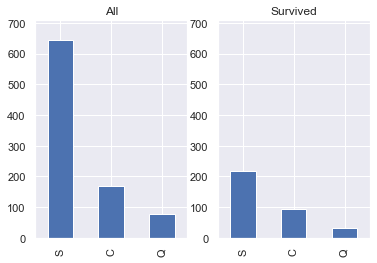

       All Abs  Expected  Surv Abs  All Norm  Surv Norm  Norm Ratio  Ex Ratio
S        644.0    247.19     217.0      0.72       0.63       -0.13     -0.13
C        168.0     64.48      93.0      0.19       0.27        0.37      0.37
Q         79.0     30.32      32.0      0.09       0.09        0.05      0.05
Total    891.0    342.00     342.0      1.00       1.00        0.29      0.29


In [9]:
# Check Embarked
cat_vis(df_train, df_train_surv, "Embarked_filled")
cat_dist(df_train, df_train_surv, "Embarked_filled")

In [ ]:
# Compare Age distribution between survival
def boxplots(df, df_surv, var):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df[[var]].boxplot(ax=axes[0])
    df_surv[[var]].boxplot(ax=axes[1])
    y_max = df[[var]].max()
    y_max *= 1.1
    axes[0].set_title("All")
    axes[1].set_title("Surv")
    axes[0].set_ylim([0, int(y_max)])
    axes[1].set_ylim([0, int(y_max)])
    plt.title("")
    plt.show()
    
def histograms(df, df_surv, var):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df[var].hist(ax=axes[0], bins=20)
    df_surv[var].hist(ax=axes[1], bins=20)
    axes[0].set_title("All")
    axes[1].set_title("Surv")
    limit = max(axes[0].get_ylim(), axes[1].get_ylim())[1]
    limit *= 1.1
    axes[0].set_ylim([0, int(limit)])
    axes[1].set_ylim([0, int(limit)])
    plt.show()
    

def distributions(df, df_surv, var):
    summary = pd.DataFrame({
        "All": [np.mean(df[var]), np.median(df[var])],
        "Surv": [np.mean(df_surv[var]), np.median(df_surv[var])],
    }, index=["Mean", "Median"])
    summary = round(summary, 2)
    print(summary)

In [ ]:
# Age Comparison with NaN filled with mean
boxplots(df_train, df_train_surv, "Age_filled")
histograms(df_train, df_train_surv, "Age_filled")
distributions(df_train, df_train_surv, "Age_filled")

In [ ]:
# Age Comparison with NaNs omitted
boxplots(df_train, df_train_surv, "Age")
histograms(df_train, df_train_surv, "Age")
distributions(df_train, df_train_surv, "Age")

In [ ]:
# Check Age Classes (see engineering in feature_processing.py)
cat_vis(df_train, df_train_surv, "Age_Class")
cat_dist(df_train, df_train_surv, "Age_Class")

In [ ]:
# Fares Comparison
boxplots(df_train, df_train_surv, "Fare")
histograms(df_train, df_train_surv, "Fare")
distributions(df_train, df_train_surv, "Fare")